<a href="https://colab.research.google.com/github/ShrutiChrist/AML/blob/main/Lab5_2348545.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/program_5_dataset.csv')
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#checking for null values
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
#dropping index column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#dropping null values and reassigning indexes
data = data.dropna()
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

<ipython-input-387-aeb0cd1a5604>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['index'], axis=1, inplace=True)


In [ ]:
#declaring predictor and target variables
X=data[['CREA']]
Y=data['PROT']

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#fitting linear model
from sklearn.linear_model import LinearRegression
reg_Model = LinearRegression()
reg_Model.fit(X_train,Y_train)

LinearRegression()

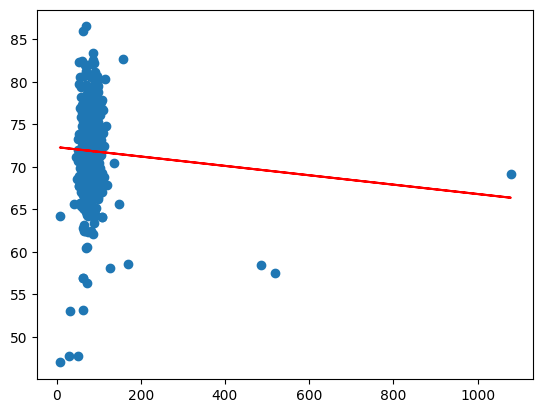

In [ ]:
#plotting the linear model
import matplotlib.pyplot as plt
plt.plot(X_train,reg_Model.predict(X_train),color='r')
plt.scatter(X_train,Y_train)

In [ ]:
#finding R2 score of linear model
from sklearn.metrics import r2_score
score = r2_score(Y_test, reg_Model.predict(X_test))
print(score)

-0.014445617877416606


Having a -ve R2 means the model is worse than mean as predicted values for all values of X

In [ ]:
#declaring predictor and target variables
X=data.drop(columns=['PROT','Age','Sex','Category'],axis=1)
Y=data['PROT']

In [ ]:
#calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0     ALB  31.162740
1     ALP  10.024253
2     ALT   3.184002
3     AST   2.938453
4     BIL   1.678633
5     CHE  22.397373
6    CHOL  27.238712
7    CREA   3.656226
8     GGT   2.542260


In [ ]:
#dropping features with high VIF
X=X.drop(columns=['ALB','CHOL','ALP'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

  feature       VIF
0     ALT  3.095289
1     AST  2.791325
2     BIL  1.565540
3     CHE  4.883893
4    CREA  3.243128
5     GGT  2.050016


In [ ]:
#standardizing features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[X.columns]=sc.fit_transform(X)
X.head()

,ALT,AST,BIL,CHE,CREA,GGT
0,-0.909467,-0.350319,-0.199084,-0.590180,0.473037,-0.478022
1,-0.416994,-0.269871,-0.411745,1.358256,-0.154478,-0.413725
2,0.453200,0.593404,-0.281786,0.287535,0.080840,-0.090402
3,0.185448,-0.334848,0.474342,-0.406365,-0.036819,-0.079380
4,0.281074,-0.266777,-0.075032,0.429992,-0.115259,-0.151025


In [ ]:
#splitting data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#fitting multi-linear regression
reg_Model1 = LinearRegression()
reg_Model1.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#finding R2 score for the same
score1 = r2_score(Y_test, reg_Model1.predict(X_test))
print(score1)

0.07505668192140047


In [ ]:
#finding -ve mean squared error for the same
from sklearn.model_selection import cross_val_score
import numpy as np
mse=cross_val_score(reg_Model1,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-27.88013734533713


In [ ]:
#fitting polynomial regression on highest VIF as predictor
X1=X[['CHE']]
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y,test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
p1=PolynomialFeatures(degree=2,include_bias=True)
x_train_p1=p1.fit_transform(X1_train)
x_test_p1=p1.transform(X1_test)

In [ ]:
#finding the R2 score for the same
reg_Model2=LinearRegression()
reg_Model2.fit(x_train_p1,Y1_train)
y_predict2=reg_Model2.predict(x_test_p1)
score2=r2_score(Y1_test,y_predict2)
print(score2)

0.1185673963119902


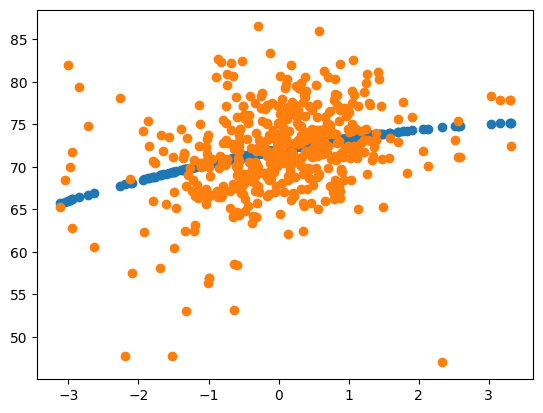

In [ ]:
#plotting the same
plt.scatter(X1_train,reg_Model2.predict(x_train_p1))
plt.scatter(X1_train,Y1_train)

In [ ]:
#changing degree
p2=PolynomialFeatures(degree=3,include_bias=True)
x_train_p2=p2.fit_transform(X1_train)
x_test_p2=p2.transform(X1_test)

In [ ]:
#finding the R2 score for the same
reg_Model3=LinearRegression()
reg_Model3.fit(x_train_p2,Y1_train)
y_predict3=reg_Model3.predict(x_test_p2)
score3=r2_score(Y1_test,y_predict3)
print(score3)

0.11090822261895406


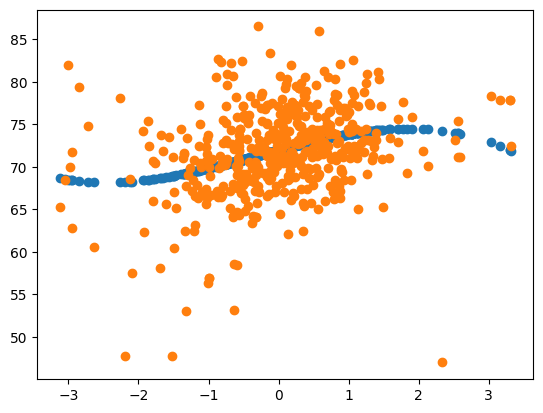

In [ ]:
#plotting the same
plt.scatter(X1_train,reg_Model3.predict(x_train_p2))
plt.scatter(X1_train,Y1_train)

In [ ]:
#changing the degree again
p3=PolynomialFeatures(degree=5,include_bias=True)
x_train_p3=p3.fit_transform(X1_train)
x_test_p3=p3.transform(X1_test)

In [ ]:
#finding the R2 score for the same
reg_Model4=LinearRegression()
reg_Model4.fit(x_train_p3,Y1_train)
y_predict4=reg_Model4.predict(x_test_p3)
score4=r2_score(Y1_test,y_predict4)
print(score4)

0.052908217372210964


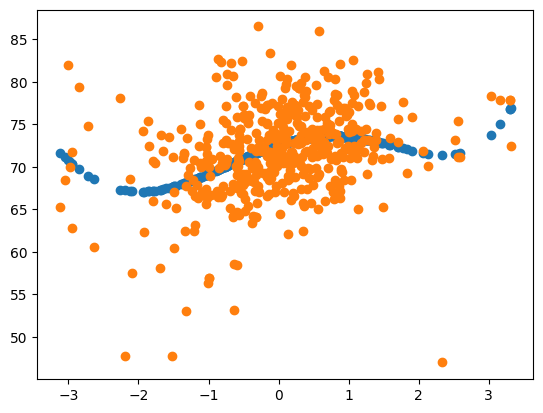

In [ ]:
#plotting the same
plt.scatter(X1_train,reg_Model4.predict(x_train_p3))
plt.scatter(X1_train,Y1_train)

In [ ]:
#fitting Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.1,1,5,10,20,30,45,60,75,90,100,125,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [ ]:
#finding the optimum alpha value and least -ve mean square error
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-26.526591665808223


In [ ]:
#fitting Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[0.1,1,5,10,20,30,45,60,75,90,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 30, 45, 60, 75, 90, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#finding the optimum alpha value and least -ve mean square error
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.1}
-26.076284097684585


In [ ]:
#predicting values using Ridge and Lasso
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [ ]:
#finding R2 score for Lasso
score5 = r2_score(Y_test, prediction_lasso)
print(score5)

0.09607729429250111


In [ ]:
#finding R2 score for Ridge
score6 = r2_score(Y_test, prediction_ridge)
print(score6)

0.09058578238822135


<BarContainer object of 7 artists>

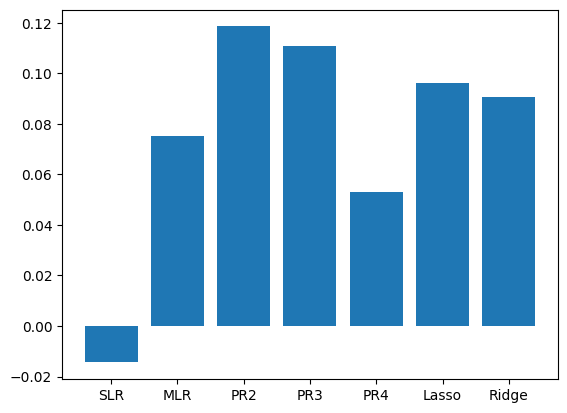

In [ ]:
#plotting all the R2 scores from different models
Y=[score,score1,score2,score3,score4,score5,score6]
X=['SLR','MLR','PR2','PR3','PR4','Lasso','Ridge']
plt.bar(X,Y)

We see that all the model are comparitively better than simple linear regression.
For this data set polynomial regression with degree 2 holds the highest R2 score.
Overall, none of these models can be relied upon as their R2 score is too less